Instructions:
1. Run #1 cell to import required libraries (you may need to pip install install some of these libraries if you don't have them
2. Then run cells #2-#11 below to initialize the necessary programs
3. Finally, come back to the top and run cell #12
-You will need to input 4 things:
-Year (year of the date you want to an optimized lineup for - e.g for 4/20/2021 you input "2021")
-Month (month of the date you want to an optimized lineup for - e.g for 4/20/2021 you input "4")
-Day (day of the date you want to an optimized lineup for - e.g for 4/20/2021 you input "20")
-Model Choice (choose between "xgb" for the XGBoost model, or "ols" for the OLS model)

Enter a year (2021)2021
Enter a month (8 for August, or 12 for December)4
Enter a day (1-31)21
Choose prediction model: 'xgb' or 'ols'xgb
Pulling game data


<ipython-input-2-2f5e69f8002d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['Minutes'][a] = pd.to_numeric(all_game_data['Minutes'][a].split(':')[0]) + pd.to_numeric(all_game_data['Minutes'][a].split(':')[1])/60
<ipython-input-2-2f5e69f8002d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['Minutes'][a] = pd.to_numeric(0)
<ipython-input-2-2f5e69f8002d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_

False
Pull today's players


<ipython-input-27-2562019f29ce>:38: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  nba_schedule = get_schedule(today_date.year, playoffs=False)[get_schedule(today_date.year, playoffs=False)['DATE'] == today_date]
<ipython-input-27-2562019f29ce>:42: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  today_teams['TEAM'] = get_schedule(2021, playoffs=False)[get_schedule(2021, playoffs=False)['DATE'] == date.today()]['HOME'].append(get_schedule(2021, p

Pull today player feature data


<ipython-input-30-e20abcbe7639>:47: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  ten_bucket =  filter_player_data[(filter_player_data.Date >= ten_day) & (filter_player_data.Date < current_date)].reset_index()
<ipython-input-30-e20abcbe7639>:48: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  thirty_bucket =  filter_player_data[(filter_player_data.Date >= thirty_day) & (filter_player_data.Date < current_date)].reset_index()
<ipython-input-30-e20abcbe7639>:49: FutureWarning: Comparing Series of datetimes w

Pulling historical feature data for modeling


<ipython-input-31-fef5bb334cbd>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['DK_LAST_10_DAYS'][a] = ten_bucket['DK Pts'].mean()
<ipython-input-31-fef5bb334cbd>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['DK_LAST_30_DAYS'][a] = thirty_bucket['DK Pts'].mean()
<ipython-input-31-fef5bb334cbd>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['DK_LAST_60_DAYS'][a] = sixty_bucket['DK Pts'].

Create xgb model


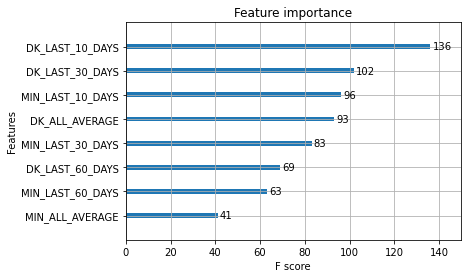

53.693568274217355
Chosen players: 
Beal, Bradley
Deck, Gabriel
Embiid, Joel
Murray, Jamal
Nader, Abdel
Paschall, Eric
Vanderbilt, Jarred
Walker, Lonnie
Westbrook, Russell
Final Projected Score:  364.0275592803955


,Player,Position,Salary,VarValue,Predicted_Draftkings_Score
8,"Embiid, Joel",C,10600.0,1.0,58.553493
4,"Vanderbilt, Jarred",PF,3200.0,1.0,33.150112
2,"Murray, Jamal",PG,3000.0,1.0,38.102028
1,"Deck, Gabriel",SF,3000.0,1.0,30.658966
7,"Walker, Lonnie",SG,3700.0,1.0,32.021610
3,"Nader, Abdel",SF,3000.0,1.0,31.103523
0,"Paschall, Eric",PF,3000.0,1.0,31.945360
6,"Westbrook, Russell",PG,10900.0,1.0,57.576794
5,"Beal, Bradley",SG,9400.0,1.0,50.915672
294,"Green, Josh",SF,3000.0,0.0,30.381685


In [36]:
#12. Once you've run cells #1-$11 below, come back and run this cell:
year = int(input('Enter a year (2021)'))
month = int(input('Enter a month (8 for August, or 12 for December)'))
day = int(input('Enter a day (1-31)'))
model_choice = input("Choose prediction model: 'xgb' or 'ols'")
today_date = datetime.date(year, month, day)

final_data = DraftKingsScore(today_date, model_choice)
final_data.sort_values('Predicted_Draftkings_Score', ascending = False).sort_values('VarValue', ascending = False).head(24)

In [12]:
#1. Import and install libraries
#pip install basketball_reference_scraper
#pip install utils
#pip install pulp
import time
import calendar
import basketball_reference_scraper
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta, date
from bs4 import BeautifulSoup
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import requests, os, collections as co, json, datetime, sys, shutil, unidecode
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc
from basketball_reference_scraper.box_scores import get_box_scores
from basketball_reference_scraper.players import get_stats, get_game_logs
from basketball_reference_scraper.seasons import get_schedule, get_standings
from basketball_reference_scraper.pbp import get_pbp
from basketball_reference_scraper.shot_charts import get_shot_chart
from basketball_reference_scraper.injury_report import get_injury_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from statsmodels.api import OLS
from tkinter import filedialog
#from datetime import date
import utils
import io
from decimal import Decimal
from pulp import *

In [2]:
#2. Load program (runs all data scraping, model feature gathering, model predictions, and then outputs optimized lineup)
def DraftKingsScore(today_date, model_choice):
 
    #1. Pull salaries and fantasy score data
    all_game_data = pull_game_data(today_date)
    for a in range(0, len(all_game_data)):
        if ':' in all_game_data['Minutes'][a]:
            all_game_data['Minutes'][a] = pd.to_numeric(all_game_data['Minutes'][a].split(':')[0]) + pd.to_numeric(all_game_data['Minutes'][a].split(':')[1])/60
        if all_game_data['Minutes'][a] == 'NA':
            all_game_data['Minutes'][a] = pd.to_numeric(0)
        if all_game_data['Minutes'][a] == 'DNP':
            all_game_data['Minutes'][a] = pd.to_numeric(0)

    print(today_date < date.today())
    if today_date < date.today():
        today_players = all_game_data[all_game_data['Date'] == today_date].reset_index().drop(['index'], axis = 1)
    else:
        today_players = pull_today_players(today_date, all_game_data)

    
    #2. Gather feature data
    today_features = pull_today_feature_data(today_players, all_game_data, today_date)
    all_game_data_feature  = pull_historical_feature_data(all_game_data)
    
    #3. Calculate projected fantasy points for each player based on selected model
    if model_choice == "xgb":
        draftkings_model, mean_squared = xgb_score(all_game_data_feature)
    if model_choice == "ols":
        draftkings_model, mean_squared = ols_score(all_game_data_feature)
    
    draftkings_pred_score = draftkings_model.predict(today_features[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']])
    today_features['Predicted_Draftkings_Score'] = draftkings_pred_score
    print(mean_squared)
    
    #5. Determine optimized roster
    total_score_optimized = roster_optimize(today_features)
    
    #6. Export final data
    final_data = export_results(total_score_optimized, today_features)

    return final_data

In [27]:
#3. Load program (pulls list of players playing on selected date)
def pull_today_players(today_date, all_game_data):
    teams = ['ATL'     ,'BRK'     ,'BOS'      ,'CHO'     ,'CHI'     ,'CLE'     ,'DAL'     ,'DEN'     ,'DET'     ,'GSW'     ,'HOU'     ,'IND'     ,'LAC'     ,'LAL'     ,'MEM'     ,'MIA'     ,'MIL'     ,'MIN'     ,'NOP'     ,'NYK'     ,'OKC'     ,'ORL'     ,'PHI'     ,'PHO'     ,'POR'     ,'SAC'     ,'SAS'     ,'TOR'     ,'UTA'     ,'WAS']
    team_name = ['Atlanta Hawks',
                  'Brooklyn Nets',
                  'Boston Celtics',
                  'Charlotte Hornets',
                  'Chicago Bulls',
                  'Cleveland Cavaliers' ,
                  'Dallas Mavericks' ,
                  'Denver Nuggets' ,
                  'Detroit Pistons' ,
                  'Golden State Warriors' ,
                  'Houston Rockets' ,
                  'Indiana Pacers' ,
                  'Los Angeles Clippers' ,
                  'Los Angeles Lakers' ,
                  'Memphis Grizzlies' ,
                  'Miami Heat',
                  'Milwaukee Bucks' ,
                  'Minnesota Timberwolves' ,
                  'New Orleans Pelicans',
                  'New York Knicks' ,
                  'Oklahoma City Thunder' ,
                  'Orlando Magic',
                  'Philadelphia 76ers',
                  'Phoenix Suns',
                  'Portland Trail Blazers',
                  'Sacramento Kings',
                  'San Antonio Spurs',
                  'Toronto Raptors',
                  'Utah Jazz',
                  'Washington Wizards']    

    team_merge = pd.DataFrame(data={'Team_Short': teams, 'TEAM': team_name})
    print("Pull today's players")

    nba_schedule = get_schedule(today_date.year, playoffs=False)[get_schedule(today_date.year, playoffs=False)['DATE'] == today_date]

    ###Make list of all players playing today
    today_teams = pd.DataFrame(index=[], columns=['TEAM'])
    today_teams['TEAM'] = get_schedule(2021, playoffs=False)[get_schedule(2021, playoffs=False)['DATE'] == date.today()]['HOME'].append(get_schedule(2021, playoffs=False)[get_schedule(2021, playoffs=False)['DATE'] == date.today()]['VISITOR'])
    today_teams = today_teams.merge(team_merge, on='TEAM', how='left') 
    #Gather player names
    today_players = pd.DataFrame(index=[], columns=['PLAYER'])
    for x in range(0, len(today_teams)):
        #print(today_teams['Team_Short'][x])
        temp_roster = get_roster(today_teams['Team_Short'][x], date.today().year)['PLAYER']
        temp_roster = pd.DataFrame(temp_roster)
        today_players= today_players.append(temp_roster)

    today_players = today_players.reset_index().drop(['index'], axis = 1)
    
    today_players['Name'] = today_players['PLAYER']
    for a in range(0,len(today_players)):
        name = today_players['PLAYER'][a]
        today_players['Name'][a] = ', '.join(reversed(name.split(' ')))
        
        
    #get salary, pos
    salary_pos = salary_pos_data(today_players, today_date, all_game_data)
    
    today_data = pd.merge(today_players, salary_pos, left_on=today_players['Name'].str.lower(), right_on=salary_pos['Name'].str.lower(), how = 'inner').reset_index().drop(['index'], axis = 1) 
    
    today_data = today_data[['Name_x', 'DK Salary', 'Pos', 'Date']].rename(columns={"Name_x": "Name", "DK Salary": "DK Salary", "Pos": "Pos", 'Date' :'Date'})
    today_data_final = pd.DataFrame()
    for a in range(0,len(today_data)):
        player_bucket = today_data[today_data['Name'] == today_data['Name'][a]].reset_index().drop(['index'], axis = 1)
        player_bucket = player_bucket.sort_values('Date', ascending = False)
        today_data_final = today_data_final.append(player_bucket.loc[0])
        
    today_data_final = today_data_final.drop_duplicates().reset_index().drop(['index'], axis = 1)
    
    return today_data_final

In [28]:
#4. Load program (pulls salary and position data of players playing on selected date)

def salary_pos_data(today_players, today_date, all_game_data):
    nba_schedule = get_schedule(today_date.year, playoffs=False)
    #http://rotoguru1.com/cgi-bin/hyday.pl?mon=4&day=17&year=2021&game=dk

    #salary
    url_template = "http://rotoguru1.com/cgi-bin/hstats.cgi?pos=0&sort=2&game=k&colA=0&daypt=0&xavg=3&show=2&fltr=00"
    request = requests.get(url_template)
    soup = BeautifulSoup(request.text, 'lxml')
    table = soup.findAll('pre')[0].text
    read_csv = pd.read_csv(io.StringIO((table)), sep = ';')
    read_csv = read_csv[['Pos', 'Team']]
    read_csv = read_csv.rename(columns={"Pos": "Name", "Team": "DK Salary"})
    
    #positions
    name_pos = all_game_data[['Name', 'Pos', 'Date']].drop_duplicates().reset_index().drop(['index'], axis = 1)
    
    #join them
    joined_data = pd.merge(read_csv, name_pos, left_on=read_csv['Name'].str.lower(), right_on=name_pos['Name'].str.lower(), how = 'inner').reset_index().drop(['index'], axis = 1) 
    joined_data = joined_data[['Name_x', 'DK Salary', 'Pos', 'Date']].rename(columns={"Name_x": "Name", "DK Salary": "DK Salary", "Pos": "Pos", "Date" : 'Date'})
    
    return joined_data

In [29]:
#5. Load program (pulls historical fantasy scores, draft kings scores, salaries, minutes, position data of all players in the same season of the chosen date)
#For example, if your chosen date was 4-20-2021, it will gather all historical data in the 2020-2021 season)

def pull_game_data(today_date):  
    print('Pulling game data')
    #https://github.com/rogerfitz/tutorials/blob/master/draft-kings-history-scrape/roto-guru.ipynb
    nba_schedule = get_schedule(today_date.year, playoffs=False)
    url_template = "http://rotoguru1.com/cgi-bin/hyday.pl?mon=MONTH&day=DAY&year=YEAR&game=dk"
    #http://rotoguru1.com/cgi-bin/hyday.pl?mon=4&day=17&year=2021&game=dk
    all_data=pd.DataFrame()

    for game_date in nba_schedule['DATE'].unique():
        #print(game_date)
        game_date = pd.to_datetime(game_date)
        if game_date > today_date:
            next
        day = str(game_date.day)
        month = str(game_date.month)
        year = str(game_date.year)
        concat_url = url_template.replace("MONTH",month).replace("YEAR",year).replace('DAY', day)

        request = requests.get(concat_url)
        soup = BeautifulSoup(request.text, 'lxml')
        table = soup.findAll('table')[9]

        #1. Get player list
        playerlist=[]
        for a in table.findAll('a'):
            player=a.text
            if player not in ['Jump to:', 'Guards', 'Forwards', 'Centers', 'Unlisted']:
                playerlist.append(player)
        
        #2. get draft kings points
        dkpoints_sub = table.findAll('td', {'align': 'center'})
        dk_points = []
        for ele in dkpoints_sub:
            try:
                for a in ele:
                    if a[0].isdigit():
                        dk_points.append(a)
                    if a[0] == '-':
                        dk_points.append(a)
            except:
                pass
        
        #3. get salary
        salary_sub = table.findAll('td', {'align': 'right'})
        salary = []
        for ele in salary_sub:
            try:
                for a in ele:
                    if a[0] == '$' or 'N/A' in a:
                        salary.append(a)
            except:
                pass

        #4. #get minutes
        minutes_sub = table.findAll('td', {'align': 'right'})
        minutes = []
        for ele in minutes_sub:
            try:
                for a in ele:
                    if ':' in a or 'DNP' in a or 'NA' in a:
                        minutes.append(a)
            except:
                pass
        
        #5. Get positions
        position_sub = table.findAll('td')
        positions = []
        for ele in position_sub:
            try:
                for a in ele:
                    if a in ['PG', 'SG', 'PG/SG','PG/SF', 'PG/PF', 'PG/C' 'SG', 'SG/SF', 'SG/PF', 'SG/C','SF', 'SF/PF', 'SF/C', 'PF','PF/C', 'C', 'NA']:
                        positions.append(a)
            except:
                pass

        for x in range(0,len(positions)):
            if x < len(positions)-1:
                if positions[x] == 'NA' and positions[x+1] != 'NA':
                    del positions[x]
                if positions[x] == 'NA' and positions[x-1] != 'NA':
                    del positions[x]
            if x == len(positions)-1:
                if positions[x] == 'NA' and positions[x-1] != 'NA':
                    del positions[x]
                    


        player_data = pd.DataFrame()
        #print(len(positions))
        #print(len(dk_points))
        #print(len(salary))
        #print(len(minutes))
        #print(len(playerlist))
        
        for x in range(len(positions),len(dk_points)):
            bounds = [len(positions), len(dk_points)-1]
            positions[bounds[0]:bounds[1] + 1] = ['NA'] * ((bounds[1] + 1) - bounds[0])

        player_data['Pos'] = positions
        player_data['DK Pts'] = dk_points
        player_data['DK Salary'] = salary
        player_data['Minutes'] = minutes
        player_data['Name'] = playerlist
        player_data['Date'] = game_date

        all_data = pd.concat([all_data,player_data])
        
    all_data = all_data.reset_index().drop(['index'], axis = 1)
    
    #all_data = all_data[all_data['Date'].str.contains("file") == False]
    #all_data = all_data.dropna().reset_index().drop(['index'], axis = 1)
    #table = soup.findAll('pre')[1].text
    #read_csv = pd.read_csv(io.StringIO((table)), sep = ';')
    #for x in range(0,len(all_data)):
        #all_data['Date'][x] = pd.to_datetime(all_data['Date'][x], format='%Y%m%d')
    
    return all_data

In [30]:
#6. Load program (organizes data we just pulled into feature data we will use to make fantasy predictions on players of chosen date)

def pull_today_feature_data(today_players, all_game_data, today_date):
    #today_players
    print('Pull today player feature data')

    today_features = pd.DataFrame(index=[], columns=['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE'])
    today_features['PLAYER'] = today_players['Name']
    today_features['Position'] = today_players['Pos']
    today_features['Salary'] = today_players['DK Salary']
    for a in range(0, len(today_players['DK Salary'])):
        if today_features['Salary'][a] != 'N/A' and '$' in str(today_features['Salary'][a]):
            today_features['Salary'][a] = int(today_players['DK Salary'][a].strip('$').replace(',',''))
        if today_features['Salary'][a] == 'N/A':
            today_features['Salary'][a] = int(0)


    #today_features['Minutes'] = pd.to_numeric(today_players['Minutes'])
    #today_features['Draftkings_Actual_Score'] =  pd.to_numeric(today_players['DK Pts'])
    today_features= today_features.reset_index().drop(['index'], axis = 1)
    
    today_features['DK_LAST_10_DAYS'] = ''
    today_features['DK_LAST_30_DAYS'] = ''
    today_features['DK_LAST_60_DAYS'] = ''
    today_features['DK_ALL_AVERAGE'] = ''
    
    today_features['MIN_LAST_10_DAYS'] = ''
    today_features['MIN_LAST_30_DAYS'] = ''
    today_features['MIN_LAST_60_DAYS'] = ''
    today_features['MIN_ALL_AVERAGE'] = ''

    #Calculate feature data actual players
    for player in range(0, len(today_features)):
        #print(player, today_features['PLAYER'][player])
        #print(player, "/", len(today_features))
        filter_player_data = all_game_data[all_game_data['Name']==today_features['PLAYER'][player]].reset_index().drop(['index'], axis = 1)[['Date', 'DK Pts', 'Minutes']]
        filter_player_data['Minutes'] = pd.to_numeric(filter_player_data['Minutes'])
        filter_player_data['DK Pts'] = pd.to_numeric(filter_player_data['DK Pts'])
        #filter_player_data['Date'] = pd.to_datetime(today_players['Date'])
        #filter_player_data = filter_player_data.dropna().reset_index().drop(['index'], axis = 1)
        current_date = today_date
        ten_day = current_date +timedelta(days=-10)
        thirty_day = current_date +timedelta(days=-30)
        sixty_day = current_date +timedelta(days=-60)


        ten_bucket =  filter_player_data[(filter_player_data.Date >= ten_day) & (filter_player_data.Date < current_date)].reset_index()
        thirty_bucket =  filter_player_data[(filter_player_data.Date >= thirty_day) & (filter_player_data.Date < current_date)].reset_index()
        sixty_bucket =  filter_player_data[(filter_player_data.Date >= sixty_day) & (filter_player_data.Date < current_date)].reset_index()
        all_bucket =  filter_player_data[(filter_player_data.Date < current_date)].reset_index()
    

        
        today_features['DK_LAST_10_DAYS'][player] = ten_bucket['DK Pts'].mean()
        today_features['DK_LAST_30_DAYS'][player] = thirty_bucket['DK Pts'].mean()
        today_features['DK_LAST_60_DAYS'][player] = sixty_bucket['DK Pts'].mean()
        today_features['DK_ALL_AVERAGE'][player] = all_bucket['DK Pts'].mean()    
        
        today_features['MIN_LAST_10_DAYS'][player] = ten_bucket['Minutes'].mean()
        today_features['MIN_LAST_30_DAYS'][player] = thirty_bucket['Minutes'].mean()
        today_features['MIN_LAST_60_DAYS'][player] = sixty_bucket['Minutes'].mean()
        today_features['MIN_ALL_AVERAGE'][player] = all_bucket['Minutes'].mean()
        
    for a in today_features.columns[0:8]:
        today_features[a] = pd.to_numeric(today_features[a])
    
    #today_features = today_features.dropna().reset_index().drop(['index'], axis = 1)
        
    return today_features 

In [31]:
#7. Load program (organizes historical data we just pulled into feature data we will use for to train the model for fantasy predictions)

def pull_historical_feature_data(all_game_data):
    print('Pulling historical feature data for modeling')
    #Collecting feature data for training
    all_game_data['DK_LAST_10_DAYS'] = ''
    all_game_data['DK_LAST_30_DAYS'] = ''
    all_game_data['DK_LAST_60_DAYS'] = ''
    all_game_data['DK_ALL_AVERAGE'] = ''

    all_game_data['MIN_LAST_10_DAYS'] = ''
    all_game_data['MIN_LAST_30_DAYS'] = ''
    all_game_data['MIN_LAST_60_DAYS'] = ''
    all_game_data['MIN_ALL_AVERAGE'] = ''    
    
    
    #Calculate feature data for training
    for a in range(0, len(all_game_data)):
        #print(a, "/", len(all_game_data))
        #print(a, all_game_data['Name'][a])
        filter_player_data = all_game_data[all_game_data['Name']==all_game_data['Name'][a]].reset_index()
        filter_player_data['Minutes'] = pd.to_numeric(filter_player_data['Minutes'])
        filter_player_data['DK Pts'] = pd.to_numeric(filter_player_data['DK Pts'])

        current_date = all_game_data['Date'][a]
        ten_day = current_date +timedelta(days=-10)
        thirty_day = current_date +timedelta(days=-30)
        sixty_day = current_date +timedelta(days=-60)


        ten_bucket =  filter_player_data[(filter_player_data.Date >= ten_day) & (filter_player_data.Date < current_date)].reset_index()
        thirty_bucket =  filter_player_data[(filter_player_data.Date >= thirty_day) & (filter_player_data.Date < current_date)].reset_index()
        sixty_bucket =  filter_player_data[(filter_player_data.Date >= sixty_day) & (filter_player_data.Date < current_date)].reset_index()
        all_bucket =  filter_player_data[(filter_player_data.Date < current_date)].reset_index()
        
        all_game_data['DK_LAST_10_DAYS'][a] = ten_bucket['DK Pts'].mean()
        all_game_data['DK_LAST_30_DAYS'][a] = thirty_bucket['DK Pts'].mean()
        all_game_data['DK_LAST_60_DAYS'][a] = sixty_bucket['DK Pts'].mean()
        all_game_data['DK_ALL_AVERAGE'][a] = all_bucket['DK Pts'].mean()
        
        all_game_data['MIN_LAST_10_DAYS'][a] = ten_bucket['Minutes'].mean()
        all_game_data['MIN_LAST_30_DAYS'][a] = thirty_bucket['Minutes'].mean()
        all_game_data['MIN_LAST_60_DAYS'][a] = sixty_bucket['Minutes'].mean()
        all_game_data['MIN_ALL_AVERAGE'][a] = all_bucket['Minutes'].mean()

    #for a in all_game_data.columns[15:22]:
        #all_game_data[a] = pd.to_numeric(all_game_data[a])
        
    all_game_data = all_game_data.dropna().reset_index().drop(['index'], axis = 1)
    
    return all_game_data 

In [32]:
#8. Load program (XGBoost model, used to predict fantasy scores for players on chosen date)

def xgb_score(all_game_data):
    print('Create xgb model')
    #Split data into training and test sets
    model_data = all_game_data.dropna().reset_index().drop(['index'], axis = 1)
    all_game_data['Minutes'] = pd.to_numeric(all_game_data['Minutes'])
    all_game_data['DK Pts'] = pd.to_numeric(all_game_data['DK Pts'])
    model_data = all_game_data[all_game_data['DK Pts'] > 24].reset_index().drop(['index'], axis = 1)
    X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
    y = model_data['DK Pts']
    
    X = X.fillna(0)
    y = y.fillna(0)
    
    #print(len(X))
    #print(len(y))

    #initialize XGBRegressor classf
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3
    )

    #fit model to the training set
    xgb_model.fit(X, y)
    y_pred = xgb_model.predict(X)


    plot_importance(xgb_model)
    plt.show()
    
    a = np.array(y) # your x
    b = np.array(y_pred) # your y
    mses = np.mean((a - b)**2)
    
    return xgb_model, mses

In [33]:
#9. Load program (OLS model, used to predict fantasy scores for players on chosen date)

def ols_score(all_game_data):
    print('Create ols model')
    #Split data into training and test sets
    model_data = all_game_data.dropna().reset_index().drop(['index'], axis = 1)
    all_game_data['Minutes'] = pd.to_numeric(all_game_data['Minutes'])
    all_game_data['DK Pts'] = pd.to_numeric(all_game_data['DK Pts'])
    model_data = all_game_data[all_game_data['DK Pts'] > 24].reset_index().drop(['index'], axis = 1)
    X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
    y = model_data['DK Pts']
    X = X.fillna(0)
    y = y.fillna(0)

    from statsmodels.api import OLS
    ols_model = OLS(y,X).fit()
    print(ols_model.summary())
    
    y_pred = ols_model.predict(X)
    
    a = np.array(y) # your x
    b = np.array(y_pred) # your y
    mses = np.mean((a - b)**2)
    return ols_model, mses

In [34]:
#10. Load program (Linear optimization model, used to choose the combination of players that will yield the maximum total fantasy score possible based on predicted fantasy scores and player salaries for that chosen day)

def roster_optimize(today_features):
    #https://towardsdatascience.com/how-to-solve-optimization-problems-with-python-9088bf8d48e5
    # Get a list of players
    today_features = today_features[today_features['Salary']!='NaN'].reset_index().drop(['index'], axis = 1)
    today_features = today_features[today_features['Position']!='NA'].reset_index().drop(['index'], axis = 1)
    today_features = today_features[today_features['Salary']>0].reset_index().drop(['index'], axis = 1)
    
    players = list(today_features['PLAYER'])
    # Initialize Dictionaries for Salaries and Positions
    salaries = dict(zip(players, today_features['Salary']))
    positions = dict(zip(players, today_features['Position']))
    # Dictionary for Projected Score for each player
    project_points = dict(zip(players, today_features['Predicted_Draftkings_Score']))
    # Set Players to Take either 1 or 0 values (owned or not)
    player_vars = LpVariable.dicts("Player", players, lowBound=0, upBound=1, cat='Integer')
    
    total_score = LpProblem("Fantasy_Points_Problem", LpMaximize)
    total_score += lpSum([project_points[i] * player_vars[i] for i in player_vars])
    total_score += lpSum([salaries[i] * player_vars[i] for i in player_vars]) <= 50000
    
    # Get indices of players for each position
    pg = [p for p in positions.keys() if positions[p] == 'PG' or positions[p] == 'PG/SG' or positions[p] == 'PG/SF']
    sg = [p for p in positions.keys() if positions[p] == 'SG' or positions[p] == 'PG/SG' or positions[p] == 'SG/SF']
    sf = [p for p in positions.keys() if positions[p] == 'SF' or positions[p] == 'SG/SF' or positions[p] == 'SF/PF' or positions[p] == 'PG/SF']
    pf = [p for p in positions.keys() if positions[p] == 'PF' or positions[p] == 'PF/C' or positions[p] == 'SF/PF']
    c = [p for p in positions.keys() if positions[p] == 'C' or positions[p] == 'PF/C']
    # Set Constraints
    total_score += lpSum([player_vars[i] for i in pg]) == 2
    total_score += lpSum([player_vars[i] for i in sg]) == 2
    total_score += lpSum([player_vars[i] for i in sf]) == 2
    total_score += lpSum([player_vars[i] for i in pf]) == 2
    total_score += lpSum([player_vars[i] for i in c]) == 1
    
    total_score.solve()
            
    return total_score

In [35]:
#11. Load program (Outputs who the chosen players are, along with expected fantasy totals)

def export_results(total_score, today_features):
    player_list = []
    variable_list = []

    lp_results = pd.DataFrame(index=[], columns=['Player', 'VarValue'])
    for variable in total_score.variables():
        player_list.append((variable.name.replace('Player_', '').replace('_', ' ')))
        variable_list.append(variable.varValue)

    final_data = pd.DataFrame(index=[], columns=['Player' 'VarValue'])
    final_data['Player'] = player_list
    final_data['VarValue'] = variable_list
    final_data = pd.merge(final_data, today_features, left_on=final_data['Player'].str.lower(), right_on=today_features['PLAYER'].str.lower(), how = 'left').reset_index().drop(['index'], axis = 1) 
    
    final_data = final_data[['Player', 'Position', 'Salary', 'VarValue', 'Predicted_Draftkings_Score']].sort_values('VarValue', ascending = False).reset_index().drop(['index'], axis = 1)
    
    #Chosen names and final score:
    print('Chosen players: ')
    for v in total_score.variables():
        if v.varValue > 0:
            print(v.name.replace('Player_', '').replace('_', ' '))
    
    print('Final Projected Score: ', pulp.value(total_score.objective))
    
    return final_data

In [ ]:
#Use bottom code to work on improving score modeling, otherwise ignore

(array([694., 673., 646., 618., 557., 477., 470., 450., 447., 376., 335.,
        326., 286., 298., 238., 243., 163., 179., 145., 159., 138., 101.,
        110.,  74.,  66.,  73.,  50.,  46.,  49.,  36.,  24.,  14.,  16.,
         10.,  12.,   9.,  14.,   5.,   9.,   4.,   4.,   2.,   2.,   0.,
          1.,   2.,   0.,   0.,   1.,   1.]),
 array([20.25 , 21.735, 23.22 , 24.705, 26.19 , 27.675, 29.16 , 30.645,
        32.13 , 33.615, 35.1  , 36.585, 38.07 , 39.555, 41.04 , 42.525,
        44.01 , 45.495, 46.98 , 48.465, 49.95 , 51.435, 52.92 , 54.405,
        55.89 , 57.375, 58.86 , 60.345, 61.83 , 63.315, 64.8  , 66.285,
        67.77 , 69.255, 70.74 , 72.225, 73.71 , 75.195, 76.68 , 78.165,
        79.65 , 81.135, 82.62 , 84.105, 85.59 , 87.075, 88.56 , 90.045,
        91.53 , 93.015, 94.5  ]),
 <BarContainer object of 50 artists>)

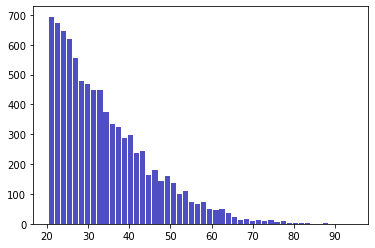

In [1371]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=model_data['DK Pts'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [1369]:
len(model_data)

8653

In [1370]:
np.percentile(model_data['DK Pts'], 50) # return 50th percentile, e.g median.


31.25

In [1360]:
from numpy import mean, std

print('Mean: ',mean(model_data['DK Pts']), 'Std: ',std(model_data['DK Pts']), 'Min: ',min(model_data['DK Pts']), 'Max: ',max(model_data['DK Pts']))

Mean:  22.419990173978384 Std:  14.567454913881061 Min:  0.25 Max:  94.5


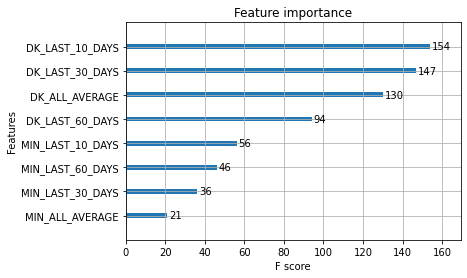

71.74636664849497


In [1372]:
################ use this to edit xgb model, change up features, test significance, etc.:
#Split data into training and test sets:

#model_data = all_game_data_feature.dropna().reset_index().drop(['index'], axis = 1)
model_data = all_game_data_feature[all_game_data_feature['DK Pts'] > 30]
X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
#X = all_game_data_feature[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE']] # put features in here

y = model_data['DK Pts']

#create test groups
X_train, X_test, y_train, y_test  = train_test_split(X, y)
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)
X_test = X_test.fillna(0)
y_test = y_test.fillna(0)

#initialize XGBRegressor class
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
regressor = xgb.XGBRegressor(
    booster = 'gbtree', #gblinear
    eta = 0.2,
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
#fit model to the training set
regressor.fit(X_train, y_train)
#Create predictions
y_pred = regressor.predict(X_test)
#See which features most utilitized
plot_importance(regressor)
plt.show()
#Check error
print(mean_squared_error(y_test, y_pred))


In [1373]:
# use this to edit ols model, change up features, test significance, etc.:
#Split data into training and test sets

#model_data = all_game_data_feature.dropna().reset_index().drop(['index'], axis = 1)
model_data = all_game_data_feature[all_game_data_feature['DK Pts'] > 30]
X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
y = model_data['DK Pts']
#create test groups
X_train, X_test, y_train, y_test  = train_test_split(X, y)
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)
X_test = X_test.fillna(0)
y_test = y_test.fillna(0)
from statsmodels.api import OLS
ols_model = OLS(y_train,X_train).fit()
ols_model.summary()
#Create predictions
y_pred = ols_model.predict(X_test)
#Check error
print(mean_squared_error(y_test, y_pred))


84.3212352623493
